## Star Wars: Analysis of Survey Data with Python

### Importing and inspecting the data

In [1]:
# Import required packages
import requests
import io
import pandas as pd

In [2]:
# Import data from the following url
data = requests.get("https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv")

with io.open("starwars.csv", "w+", encoding="utf-8") as f:
    f.write(data.text)

In [3]:
# From the imported data, create a DataFrame
df = pd.read_csv("starwars.csv")
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


It appears that the first row

In [4]:
# Assign back to df all rows except the first
df = df.iloc[1:]

In [5]:
# Inspect which columns are in the dataset
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning the data

First, we will clean the data. We will achieve this incrementally by creating a dataframe from a subset of columns, cleaning these, and then merging more untidy columns into this new dataframe to clean, and so on.

In [6]:
clean_df = df[["RespondentID", 
                 "Have you seen any of the 6 films in the Star Wars franchise?", 
                 "Do you consider yourself to be a fan of the Star Wars film franchise?"
]].copy()

In [7]:
# Creat a dictionary for the mapping of values
yes_no = {
    "Yes": True,
    "No": False
}

In [8]:
# Apply the mapping by iterating through the two question columns
for i in ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]:
    clean_df[i] = clean_df[i].map(yes_no)

In [9]:
clean_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True


In [10]:
# Print the value counts for the two questions in clean_df:
print(clean_df["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(), "\n")
print(clean_df["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [11]:
clean_df = clean_df.merge(
    df.iloc[:,3:9], left_index = True, right_index = True)

In [12]:
# Use the pandas notnull() function to assign True/ False to new column values
clean_df.iloc[:,3:9] = clean_df.iloc[:,3:9].notnull()

In [13]:
# Rename columns
columns = ["id", "seen_any", "fan", "seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]
clean_df.columns = columns

In [14]:
# How many True and False values for each question?
counts = clean_df.iloc[:, 1:].apply(pd.value_counts)
counts

# Note: This iterates across each column, passing the column into the value_counts FUNCTION 

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,250,284,513,615,636,579,428,448
True,936,552,673,571,550,607,758,738


In [15]:
# What is the total count for each question?
total = clean_df.iloc[:,1:].apply(lambda x: x.count())
total

# Note: This iterates across each series (each column is a series) and applies a METHOD on each series

seen_any    1186
fan          836
seen_1      1186
seen_2      1186
seen_3      1186
seen_4      1186
seen_5      1186
seen_6      1186
dtype: int64

In [16]:
# What are the percentages?
perc = round((counts/ total) * 100, 1)
perc

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,21.1,34.0,43.3,51.9,53.6,48.8,36.1,37.8
True,78.9,66.0,56.7,48.1,46.4,51.2,63.9,62.2


From this, we can see that the *greatest* % have seen **Episode V: The Empire Strikes Back**, whereas the *least* watched appears to be **Episode III: Revenge of the Sith**. 

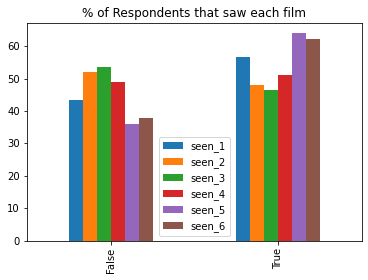

In [17]:
perc.iloc[:,2:].plot.bar(title="% of Respondents that saw each film");

In [18]:
clean_df = clean_df.merge(
    df.iloc[:,9:15], left_index = True, right_index = True)

In [19]:
clean_df.iloc[:,9:].dtypes

# Note: 'object' datatype here denotes String

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    object
Unnamed: 10                                                                                                                                      object
Unnamed: 11                                                                                                                                      object
Unnamed: 12                                                                                                                                      object
Unnamed: 13                                                                                                                                      object
Unnamed: 14                                                                                                                                      object
dtype: object

In [20]:
# Convert new columns to float datatype
clean_df[clean_df.columns[9:15]] = clean_df[clean_df.columns[9:15]].astype(float)

In [21]:
columns += ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]
clean_df.columns = columns

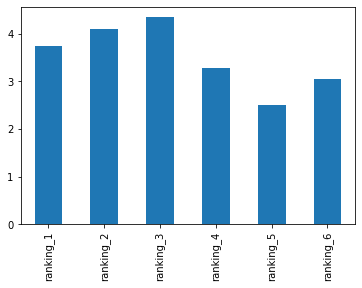

In [22]:
clean_df.iloc[:,9:15].mean().plot.bar();

Remember: the lower the ranking, the more a respondent preferred the film (e.g., 1 for favourite film). Therefore, it would appear that **Episode V** was the favourite film on average, whereas **Episode III** was the least liked film in the franchise.

In fact, it would appear that the original trilogy (last 3 films) were overall more popular with fans than films in the prequel trilogy.